Description:

The purpose of this notebook is to be used as a playground for analyzing weather and sensor data. 


This notebook allows you to load 2 datasets (any 2 that you choose).
It will display the raw, unfiltered tabular data. 
It will display the data in intervals of 20 minutes.
It will also plot 2 curves that you choose using Matplotlib near the end of the notebook. 

In [ ]:
import pandas as pd
import sys

In [3]:
set1 = pd.read_csv('data/Weather_Sep_21_17_20.csv')
set2 = pd.read_csv('data/Weather_Sep_21_17_20.csv')

# Humidity: Relative Humidity in %
# Temperature: Temperature in *C
# Moisture: Volumetric Water Content of Soil
# Moisture after Watering: -1 if garden was not watered. If not -1, then this is the Volumetric Water Content after watering the garden
# Light: The smaller the value, the more sunlight there is
# Datetime: Time of recording data
COLUMNS = ['Humidity', 'Temperature', 'Moisture', 'Moisture after Watering', 'Light', 'Datetime']
set1.columns = COLUMNS
set2.columns = COLUMNS

In [55]:
set1

,Humidity,Temperature,Moisture,Moisture after Watering,Light,Datetime
0,75.0,26.0,83.84,-1,13542.71,01-01-1970.00:01
1,75.9,26.0,83.87,-1,15039.03,01-01-1970.00:02
2,76.0,26.0,83.87,-1,17211.67,01-01-1970.00:02
3,75.4,26.0,83.84,-1,19665,01-01-1970.00:03
4,75.0,26.0,83.87,-1,22538.84,01-01-1970.00:04
5,75.1,26.0,83.84,-1,25819.7,01-01-1970.00:04
6,75.9,26.0,83.84,-1,29575.87,01-01-1970.00:05
7,76.0,25.7,83.84,-1,33807.64,01-01-1970.00:06
8,76.0,25.7,83.84,-1,38254.65,01-01-1970.00:06
9,76.0,26.0,83.81,-1,43606.87,01-01-1970.00:07


Display a table of all data in 20-minute intervals.

In [4]:
# Select only data collected in intervals of 20 minutes
# Put the relevant datasets into set1_cleansed
set1_cleansed = pd.DataFrame(columns=COLUMNS)

# Append the first row of relevant data, which is the first entry in set1
set1_cleansed = set1_cleansed.append(set1.iloc[0])

tracker_associate = {0: '00', 1: '20', 2: '40'}
tracker_index = 1

for i in range(len(set1)):
    row = set1.iloc[i]
    
    if row['Datetime'][-2:] == tracker_associate[tracker_index%3]:
        set1_cleansed = set1_cleansed.append(row)
        tracker_index += 1
set1_cleansed


# set2_cleansed = pd.DataFrame(columns=COLUMNS)

# for i in range(len(set2)):
#     row = set2.iloc[i]
    
#     if row['Datetime'][-2:] in ('00', '20', '40'):
#         set2_cleansed = set2_cleansed.append(row) 
# set2_cleansed


,Humidity,Temperature,Moisture,Moisture after Watering,Light,Datetime
0,69.0,18.0,79.81,-1,20336.33,01-01-1970.00:01
27,64.9,19.0,80.45,-1,35087.68,01-01-1970.00:20
56,65.0,19.0,80.17,-1,34179.12,01-01-1970.00:40
85,63.0,18.9,80.72,-1,34698.30,01-01-1970.01:00
114,64.6,19.0,81.15,-1,32840.91,01-01-1970.01:20
142,72.9,17.0,80.97,-1,32961.75,01-01-1970.01:40
171,72.0,18.0,69.82,-1,33807.64,01-01-1970.02:00
200,74.9,17.0,69.09,-1,34049.32,01-01-1970.02:20
229,67.0,18.0,68.87,-1,34179.12,01-01-1970.02:40
257,68.0,18.0,68.81,-1,34049.32,01-01-1970.03:00


Plot data for 2 different datasets specified over the same time interal.

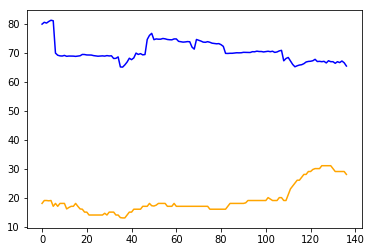

In [7]:
import matplotlib.pyplot as plt

# red dashes, blue squares and green triangles
#print(set1_cleansed["Moisture"].values)
plt.plot(set1_cleansed["Moisture"].values, color='blue')
plt.plot(set1_cleansed["Temperature"].values, color='orange')
plt.show()